In [1]:
from functions import *

In [2]:
with open('./pickles/W_list.pkl', 'rb') as f:
    W_list = pickle.load(f)
with open('./pickles/h0_list.pkl', 'rb') as f:
    h0_list = pickle.load(f)

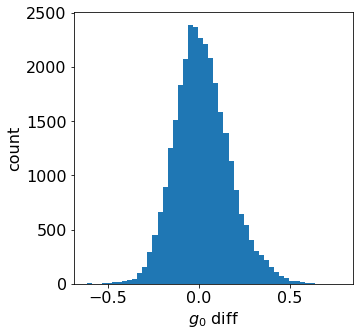

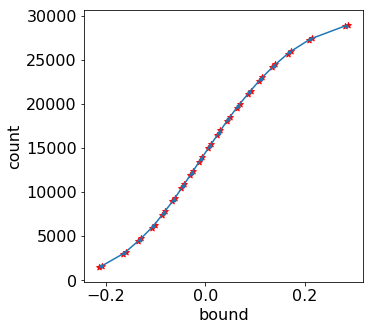

0.15016765917438257


In [3]:
data_complete = np.loadtxt('../data_complete.txt')
data_diff = make_data_diff(data_complete, n_bin=6)
delta = data_diff[:,0].std()/50
plt.figure(figsize=(5,5))
plt.rcParams.update({'font.size':16})
plt.hist(data_diff[:,0], bins=50)
plt.xlabel('$g_{0}$ diff')
plt.ylabel('count')
plt.show()

b = [np.percentile(data_diff[:,0], i) for i in np.arange(start=5, stop=100, step=5)]
count = [len(np.where(data_diff[:,0] < bound)[0]) for bound in b]
ind_p = [len(np.where(data_diff[:,0] < bound+delta)[0]) for bound in b]
ind_m = [len(np.where(data_diff[:,0] < bound-delta)[0]) for bound in b]
plt.figure(figsize=(5,5))
plt.plot(b, count, '.-')
plt.scatter(b+delta, ind_p, marker='*', c='r')
plt.scatter(b-delta, ind_m, marker='*', c='r')
plt.xlabel('bound')
plt.ylabel('count')
plt.show()
print(data_diff[:,0].std())

b = -0.21 
genes:  [3, 5, 8, 22, 36, 47, 56, 70, 83, 86]
b = -0.16 
genes:  [8, 13, 16, 22, 35, 36, 47, 70, 83, 86]
b = -0.13 
genes:  [3, 8, 13, 16, 22, 35, 36, 47, 70, 86]
b = -0.11 
genes:  [8, 13, 16, 22, 35, 36, 47, 60, 70, 83]
b = -0.08 
genes:  [3, 8, 13, 16, 22, 35, 36, 47, 60, 70]
b = -0.06 
genes:  [8, 13, 16, 22, 35, 36, 37, 70, 83, 86]
b = -0.05 
genes:  [0, 3, 16, 22, 35, 36, 47, 60, 70, 74]
b = -0.03 
genes:  [3, 16, 18, 22, 35, 36, 47, 60, 70, 83]
b = -0.01 
genes:  [0, 3, 16, 22, 35, 36, 47, 60, 70, 74]
b = 0.01 
genes:  [3, 16, 22, 35, 36, 47, 60, 65, 70, 74]
b = 0.03 
genes:  [3, 16, 18, 22, 32, 35, 36, 47, 60, 71]
b = 0.05 
genes:  [3, 13, 16, 22, 35, 36, 42, 47, 73, 91]
b = 0.07 
genes:  [3, 16, 18, 22, 32, 35, 36, 47, 71, 91]
b = 0.09 
genes:  [3, 22, 32, 35, 42, 47, 73, 83, 89, 91]
b = 0.11 
genes:  [8, 16, 18, 35, 42, 47, 56, 62, 73, 89]
b = 0.14 
genes:  [8, 16, 18, 35, 47, 56, 62, 65, 73, 89]
b = 0.17 
genes:  [8, 16, 18, 35, 50, 56, 62, 73, 86, 89]
b = 0.21 
g

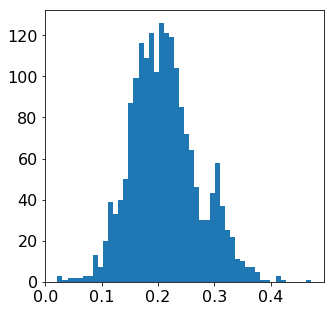

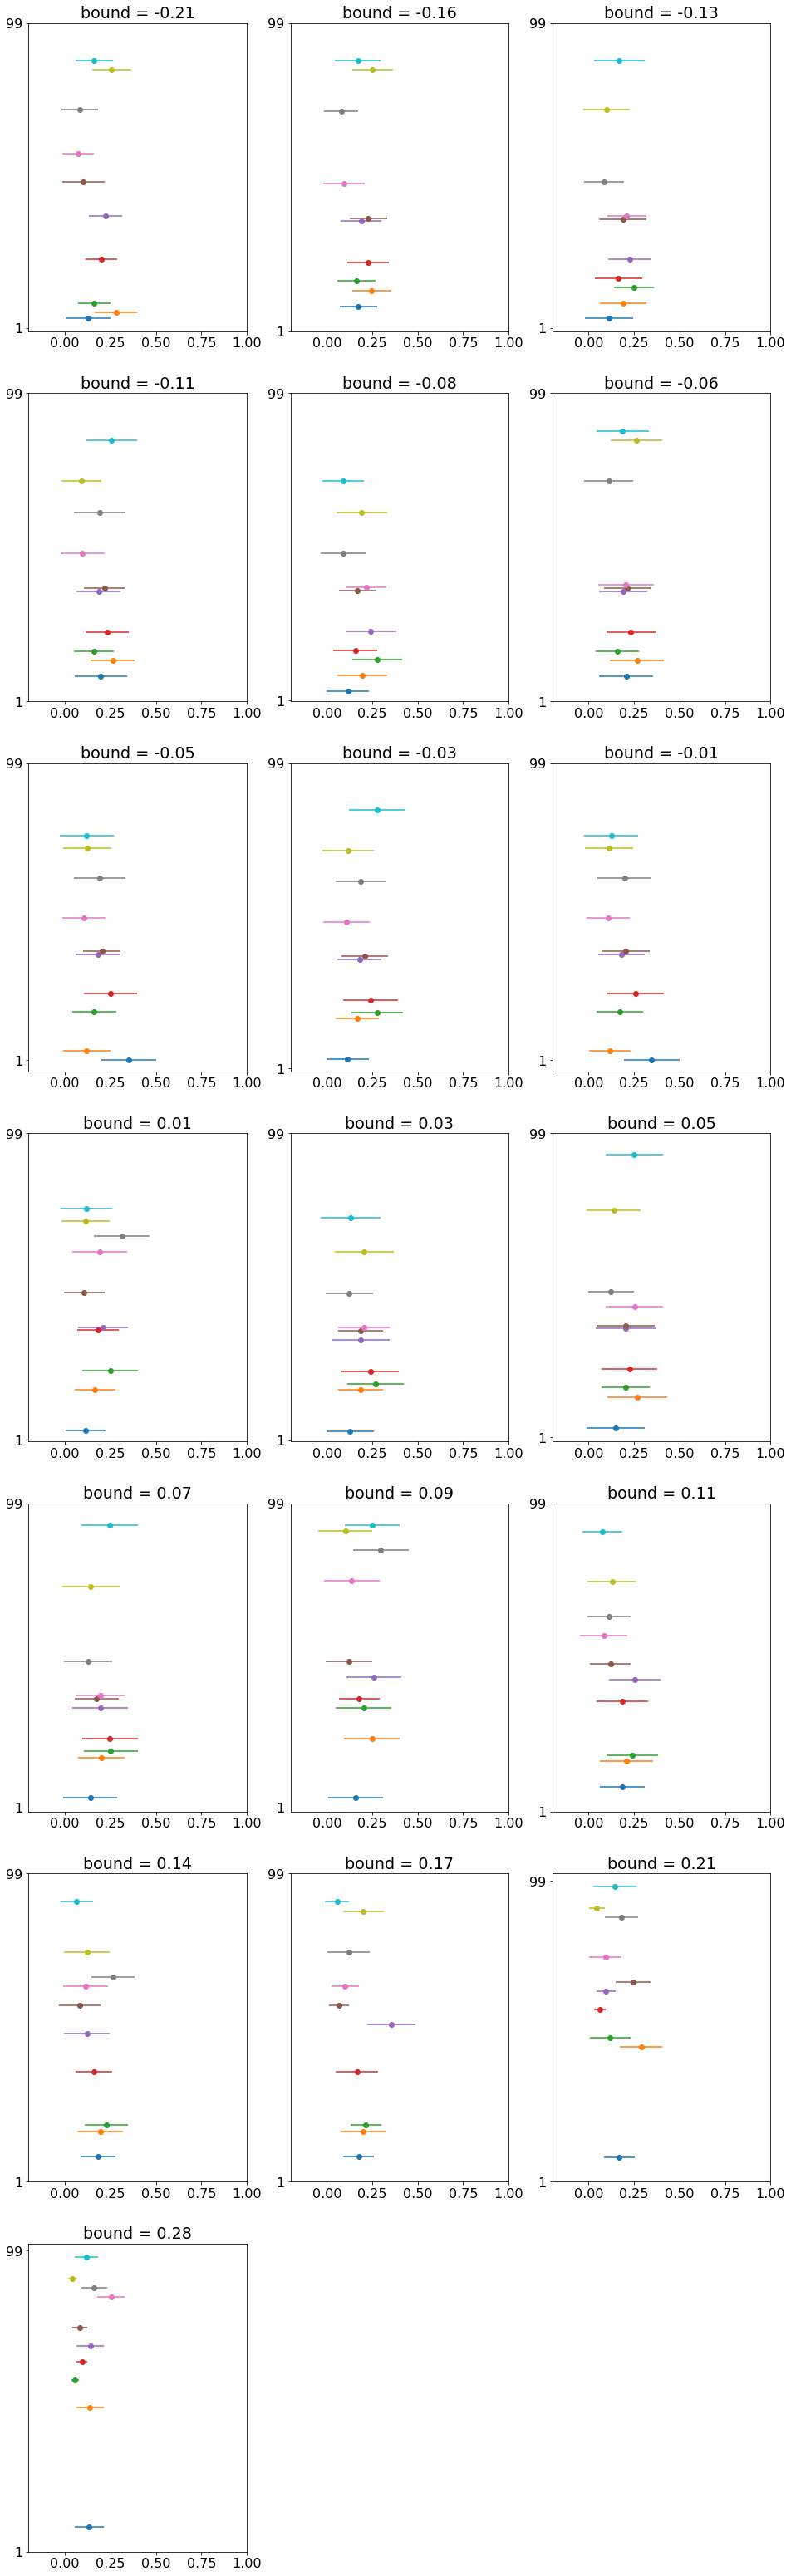

In [4]:
data_init = make_data(data_complete, n_bin=6)[0]

gene_mean = []
gene_std = []
for bound in b:
    ind = np.intersect1d(np.argwhere(data_diff[:,0] < bound+delta), np.argwhere(data_diff[:,0] > bound-delta))
#     for i in range(data_init.shape[1]):
    gene = data_init[ind,:]
    gene_mean.append(gene.mean(axis=0)) # mean of each gene for "ind" cells, len = 99*len(b)
    gene_std.append(gene.std(axis=0)) # std of each gene for "ind" cells
gene_mean = np.vstack(gene_mean)
gene_std = np.vstack(gene_std)
plt.figure(figsize=(5,5))
plt.hist(gene_std.flatten(), bins=50)
std_max = [np.percentile(gene_std[i,:], 10) for i in range(len(b))]
# std_max = np.percentile(gene_std.flatten(), 5)

gene_welldefined=[]
r, c = 1+int(len(b)/3), 3
w, h = 16, 8*r
fig = plt.figure(figsize=(w,h))
for i in range(len(b)):
    gene_welldefined_b=[]
    ax = fig.add_subplot(r, c, i+1)
    for j in range(99):
        if gene_std[i,j] < std_max[i]:
            ax.errorbar(gene_mean[i,j], j*2, xerr=gene_std[i,j], fmt='o')
            gene_welldefined_b.append(j)
            ax.set_xlim(-0.2, 1)
            ax.set_yticks([0,98*2])
            ax.set_yticklabels(['1','99'])
            ax.set_title('bound = %s' %(np.round(b[i], decimals=2)))
    gene_welldefined.append(gene_welldefined_b)
    print('b =', np.round(b[i], decimals=2), '\ngenes: ', gene_welldefined_b)
gene_welldefined = np.vstack(gene_welldefined)
unique, count = np.unique(gene_welldefined.flatten(), return_counts=True)
array = np.asarray((unique, count))
gene_welldefined_sorted = array[:, array[1].argsort()]
print(gene_welldefined_sorted)
golden = gene_welldefined_sorted[0,-8:]

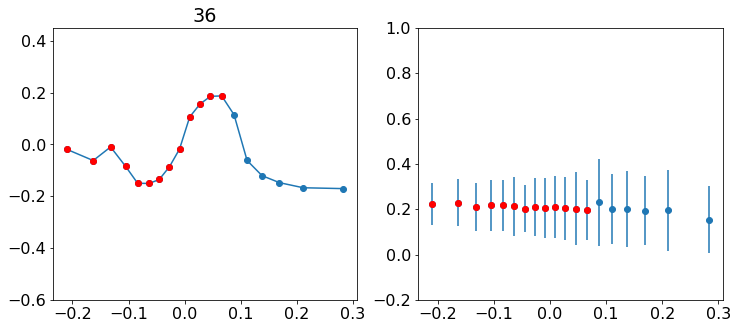

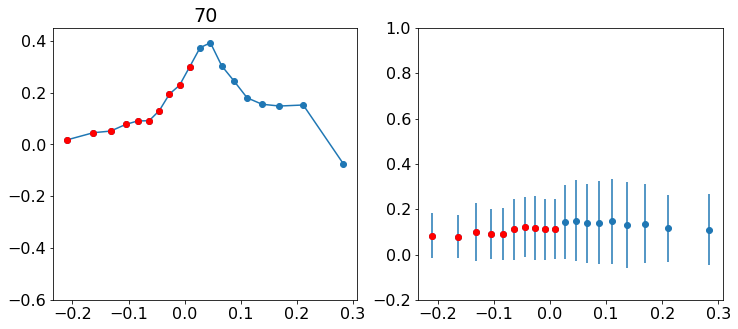

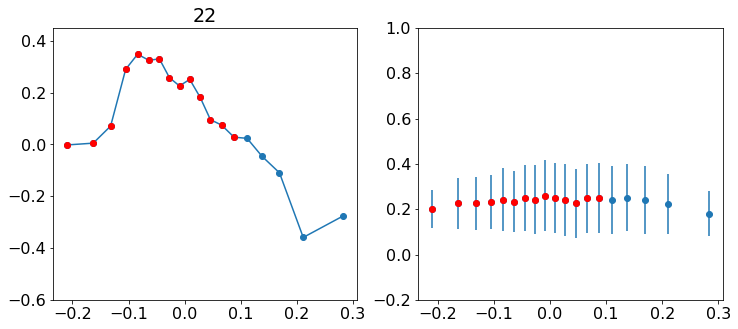

In [5]:
for gene in np.array([36,70,22]):
    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))
    ax1.plot(b, [W_list[i][gene,0] for i in range(len(b))], 'o-')
    ax2.errorbar(b, [(gene_mean[i,gene]) for i in range(len(b))], yerr=[gene_std[i,gene] for i in range(len(b))], fmt='o')
    ind = np.where(gene_welldefined == gene)[0]
    ax1.plot([b[i] for i in ind], [W_list[i][gene,0] for i in ind], 'ro')
    ax2.errorbar([b[i] for i in ind], [gene_mean[i,gene] for i in ind], yerr=0, fmt='ro')
    ax2.set_ylim([-0.2,1])
    ax1.set_ylim(-0.6,0.45)
    ax1.set_title(gene)

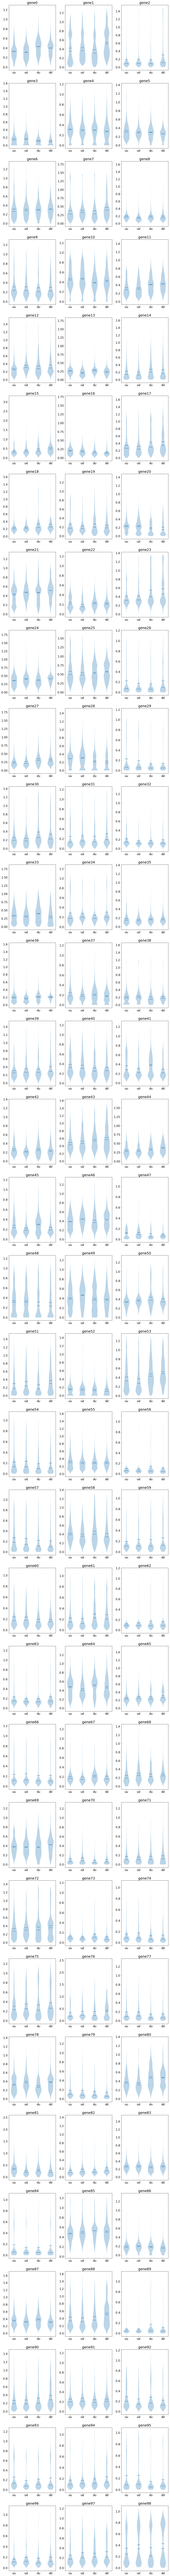

In [6]:
data_complete = np.loadtxt('../data_complete.txt')
data_init = make_data(data_complete, n_bin=6)[0]
data_diff = make_data_diff(data_complete, n_bin=6)
median_g0 = np.percentile(data_diff[:,0], 50)
median_g1 = np.percentile(data_diff[:,1], 50)

ind_uu = np.intersect1d(np.argwhere(data_diff[:,0] > median_g0), np.argwhere(data_diff[:,1] > median_g1))
ind_ud = np.intersect1d(np.argwhere(data_diff[:,0] > median_g0), np.argwhere(data_diff[:,1] < median_g1))
ind_du = np.intersect1d(np.argwhere(data_diff[:,0] < median_g0), np.argwhere(data_diff[:,1] > median_g1))
ind_dd = np.intersect1d(np.argwhere(data_diff[:,0] < median_g0), np.argwhere(data_diff[:,1] < median_g1))

ind = list((ind_uu, ind_ud, ind_du, ind_dd))
labels = ['uu', 'ud', 'du', 'dd']

r, c = 34, 3
w, h = 16, 8*r
fig = plt.figure(figsize=(w,h))
plt.rcParams.update({'font.size':16})
for i in range(99):
    ax = fig.add_subplot(r, c, i+1)
#     ax.errorbar(range(4), [np.mean(data_init[ind[j],i]) for j in range(4)], yerr=[np.std(data_init[ind[j],i]) for j in range(4)], fmt='o')
    ax.violinplot(dataset=[data_init[ind[j], i] for j in range(4)], showmeans=True, showextrema=False, showmedians=True)
    ax.set_xticks(range(1,5))
    ax.set_xticklabels(labels)
    ax.set_title('gene%s' % i)
#     for (x,y) in it.combinations(range(4),2):
#         p = stats.ttest_ind(data_init[ind[x], i], data_init[ind[y], i], equal_var=False)[1]
#         if p < 0.05/(6*99):
#             ax.text((x+y+2)/2, 1.5,'*')
    